# <font color = 'red'> ЛР 1. Введение. Инструменты python для базовых задач МО. </font>

In [11]:
import numpy as np
import sympy as sp
import random
import math
import csv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression

## <font color = 'red' size = 5>Задание 1 </font>

1. Изучите иструменты для создания массивов библиотеки numpy.Используя возможности библиотеки (без циклов) выполните следующие задания.
2. Реализуйте функцию для создания "шахматной" квадратной двоичной матрицы произвольного размера.
3. Реализуйте функцию для создания матрицы для сетки координа x и y, покрывающими область [0,1] x [0,1] на плоскости. На вход функция принимает количество точек сетки.
4. Реализуйте функцию, которая генерирует классическую матрицу судоку заполненную полностью или частично.


### 1.1 Ну типа изучил

### 1.2 

In [12]:
def chess_board(n, start=0):
    if start == 0:
        board  = np.ones((n, n), dtype=int)
        board[0:n:2, 0:n:2] = 0
        board[1:n:2, 1:n:2] = 0
    else:
        board  = np.zeros((n, n), dtype=int)
        board[0:n:2, 0:n:2] = 1
        board[1:n:2, 1:n:2] = 1
    return board

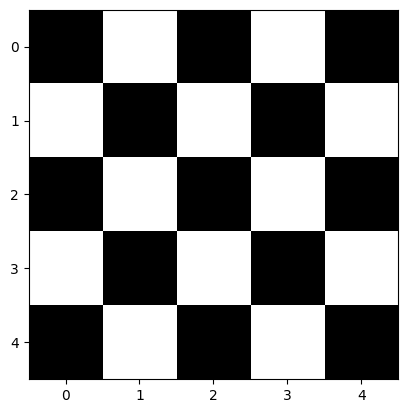

In [17]:
plt.imshow(chess_board(5, start=1), cmap='binary');

### 1.3

In [18]:
def gen_mesh(points_amount:int):
    if sp.isprime(points_amount):
        raise ValueError('Невозможно задать сетку так как количество точек - простое число!')
    div =  sp.divisors(points_amount)[1:-1]
    x_k = div[len(div) // 2]
    y_k = points_amount // x_k
    # print(x_k,y_k)
    x = np.repeat([np.linspace(0, 1, x_k)], y_k, axis=0)
    y = np.repeat([np.linspace(0, 1, y_k)], x_k, axis=0)
    return x, y.T
    

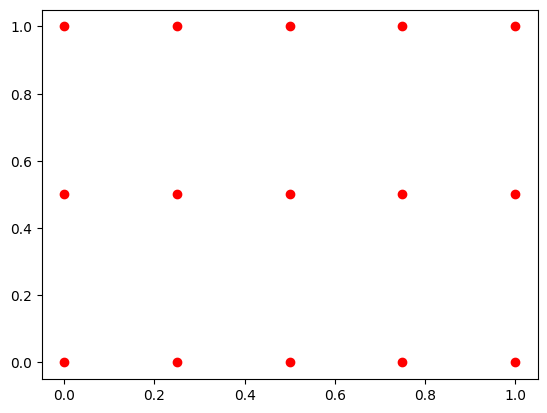

In [21]:
plt.scatter(*gen_mesh(15), marker='o', color='r')
plt.show()

### 1.4 

In [22]:
def generate_base_field():
    base_row = np.array(range(1, 10))
    amount_rolls =np.concatenate([np.array([-3, -6, -10, -13]), -1 + np.array([-6, -10, -13, -16])])
    res = map(lambda x:np.roll(base_row, x), amount_rolls)
    return np.vstack([base_row ,np.array(list(res))])



def change_rand_rows(matr):
    m = matr.copy()
    k = random.choice([0, 1, 2])
    i = random.choice(range(3 * k, 3 *(k + 1), 1))
    while True:
        j = random.choice(range(3 * k, 3 * (k + 1), 1))
        if j != i:
            break
    #print(i, j)
    row1 = matr[i, :].copy()
    row2 = matr[j, :].copy()
    m[j] = row1
    m[i] = row2
    return m



def change_rand_columns(matr):
    m = matr.copy()
    k = random.choice([0, 1, 2])
    i = random.choice(range(3 * k, 3 *(k + 1), 1))
    while True:
        j = random.choice(range(3 * k, 3 * (k + 1), 1))
        if j != i:
            break
    #print(i, j)
    row1 = matr[:, i].copy()
    row2 = matr[:, j].copy()
    m[:, j] = row1
    m[:, i] = row2
    return m

def transport(matr):
    return matr.T



def change_three_rows(matr):
    m = matr.copy()
    k1 = random.choice([0, 1, 2])
    start1, end1 = 3 * k1, 3 * (k1 + 1)
    while True:
        k2 =  random.choice([0, 1, 2])
        if k2 != k1:
            break
    #print(k1, k2)
    start2, end2 = 3 * k2, 3 * (k2 + 1)
    row1 = matr[start1:end1, :].copy()
    row2 = matr[start2:end2, :].copy()
    m[start2:end2] = row1
    m[start1:end1] = row2
    return m


def change_three_columns(matr):
    m = matr.copy()
    k1 = random.choice([0, 1, 2])
    start1, end1 = 3 * k1, 3 * (k1 + 1)
    while True:
        k2 =  random.choice([0, 1, 2])
        if k2 != k1:
            break
    #print(k1, k2)
    start2, end2 = 3 * k2, 3 * (k2 + 1)
    row1 = matr[:, start1:end1].copy()
    row2 = matr[:, start2:end2].copy()
    m[:, start2:end2] = row1
    m[:, start1:end1] = row2
    return m


def build_full_field(rounds=10):
    matr = generate_base_field()
    for i in range(rounds):
        func = random.choice([transport, change_three_columns, change_three_rows, change_rand_rows, change_rand_columns])
        #print(func.__name__)
        matr = func(matr).copy()
        #print(matr)

    return matr
    

In [23]:
build_full_field(100)

array([[3, 6, 9, 4, 7, 1, 2, 8, 5],
       [5, 8, 2, 6, 9, 3, 4, 1, 7],
       [4, 7, 1, 5, 8, 2, 3, 9, 6],
       [7, 1, 4, 8, 2, 5, 6, 3, 9],
       [8, 2, 5, 9, 3, 6, 7, 4, 1],
       [6, 9, 3, 7, 1, 4, 5, 2, 8],
       [1, 4, 7, 2, 5, 8, 9, 6, 3],
       [9, 3, 6, 1, 4, 7, 8, 5, 2],
       [2, 5, 8, 3, 6, 9, 1, 7, 4]])

## <font color = 'red' size = 5>Задание 2 </font>

Используя векторизацию и матричные вычисления выполните задачи.

1. Реализуйте учебную модель [Игры "Жизнь"](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life). Создайте также динамическое изображение.

2. Реализуйте [расширенный алгоритм Евклида](https://en.wikipedia.org/wiki/Extended_Euclidean_algorithm) в матричном виде. Протестируйте как устроены типы данных в numpy? Возможно ли, что на некоторых значенияъ алгоритм откажется работать правильно?
   
3. Усложнённое задание: Расширенная игра "Жизнь"

Описание задачи:

    Создайте начальную случайную матрицу размером 50x50 с клетками, представляющими состояние "живая" или "мёртвая" (0 или 1).

    Внедрите следующие дополнительные правила:
        
        Время жизни: Каждая живая клетка будет иметь счётчик времени жизни. Если клетка жива больше определённого количества поколений (например, 5), она умирает.
        Мутанты: В случайные моменты времени появляются "мутанты" (клетки, которые могут быть либо живыми, либо мёртвыми, и они могут изменять состояния соседних клеток).

### 2.1

In [143]:
size = 5
X = np.array(random.choices([0, 1], weights=[0.7, 0.3], k=size**2)).reshape(size, size)
X

array([[1, 1, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0]])

In [144]:
n = np.array([size - 1] + list(range(0, size - 1)))
print(n)
p = np.array(list(range(1, size)) + [0])
print(p)

[4 0 1 2 3]
[1 2 3 4 0]


In [145]:
X[p][:, n] # нижний левый сосед

array([[1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1]])

In [146]:
X[n][:, p] # верхний правый сосед

array([[1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0]])

In [147]:
X[p][:, p] # нижний правый сосед

array([[1, 0, 0, 1, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1]])

In [148]:
X[n][:, n] # верхний левый сосед

array([[0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0]])

In [ ]:
size = 100
k = 100
plt.clf()
%matplotlib widget
X = np.array(random.choices([0, 1], weights=[0.9, 0.1], k=size**2)).reshape(size, size)
n = np.array([size - 1] + list(range(0, size - 1)))
p = np.array(list(range(1, size)) + [0])
all_data = []
for i in range(k):
    N = X[:, n] + X[:, p] + X[n, :] + X[p, :] + X[n][:, n] + X[p][:, p] + X[n][:, p] + X[p][:, n]
    X = (X&(N==2))|(N==3).astype(int)
    all_data.append(X)
    
fig, ax = plt.subplots()
img = ax.imshow(X, cmap='Oranges_r')
def update(frame):
    img.set_array(all_data[frame])
    return img,
ani = animation.FuncAnimation(fig, update, frames=k)
plt.show() 

### 2.2

In [150]:
def expanded_echlid(a:int, b:int):
    "соглашение, что a > b"
    m = np.array([[1, 0], [0, 1]], dtype='int16')
    while b != 0:
        r = a % b
        q = (a - r) // b
        round_m = np.array([[0, 1], [1, -q]],  dtype='int16')
        m = np.dot(m, round_m)
        a = b
        b = r
    return  m[:, 0]

a, b = 15310, 3482
res = expanded_echlid(a, b)
print(*res)
print((res[0] * a + res[1] * b), math.gcd(a, b))

-645 2836
2 2


### 2.3

#### Добавление длины жизни клеток

In [ ]:
def special_sum(m1, m2):
    s = np.zeros_like(m1)
    m1[m2 == 0] = 0
    return m1 + m2

size = 100
k = 100
plt.clf()
%matplotlib widget
X = np.array(random.choices([0, 1], weights=[0.9, 0.1], k=size**2)).reshape(size, size)
n = np.array([size - 1] + list(range(0, size - 1)))
p = np.array(list(range(1, size)) + [0])
all_data = []

K = np.zeros_like(X)
for i in range(k):
    K = special_sum(K, X)
    X[K == 5] = 0
    K[K == 5] = 0
    N = X[:, n] + X[:, p] + X[n, :] + X[p, :] + X[n][:, n] + X[p][:, p] + X[n][:, p] + X[p][:, n]
    X = (X&(N==2))|(N==3).astype(int)
    all_data.append(X)
    
fig, ax = plt.subplots()
img = ax.imshow(X, cmap='Oranges_r')
def update(frame):
    img.set_array(all_data[frame])
    return img,
ani = animation.FuncAnimation(fig, update, frames=k)
plt.show() 

#### Внедрение в игру мутантов

In [ ]:
size = 50
k = 100
plt.clf()
%matplotlib widget
X = np.array(random.choices([0, 1], weights=[0.9, 0.1], k=size**2)).reshape(size, size)
n = np.array([size - 1] + list(range(0, size - 1)))
p = np.array(list(range(1, size)) + [0])
all_data = []
for i in range(k):
    mutants = [[random.choice(range(size)), random.choice(range(size))] for i in range(random.choice(range(0, 5)))]
    for t in range(len(mutants)):
        if random.choices([1, 0], weights=[0.01, 0.8]):
            i, j = mutants[t]
            ii = (i + random.choice([-1, 1])) % size
            jj = (j + random.choice([-1, 1])) % size
            X[p[ii], n[jj]] = (X[p[ii], n[jj]] + 1) % 2
            
    N = X[:, n] + X[:, p] + X[n, :] + X[p, :] + X[n][:, n] + X[p][:, p] + X[n][:, p] + X[p][:, n]
    X = (X&(N==2))|(N==3).astype(int)
    all_data.append(X)
    
fig, ax = plt.subplots()
img = ax.imshow(X, cmap='Oranges_r')
def update(frame):
    img.set_array(all_data[frame])
    return img,
ani = animation.FuncAnimation(fig, update, frames=k)
plt.show() 

## <font color = 'red' size = 5>Задание 3 </font>

1. Преобразуйте формулы для коэффициентов регрессии в матричный вид и запишите их.
2. Релиазуйте собственную модель линейной регрессии используя возможности numpy b формулы из п 1. На вход модель принимает набор $X$ и $Y$, а возвращает коэффициенты $a$ и $b$. Используйте векторизацию! 
3. Проверьте правильность модели с помощью рисунка и аналитически.
4. Сверьте полученные данные с встроенным классом библиотеки sklearn.
5. Протестируйте полученную вами модель на [реальных данных](https://www.kaggle.com/datasets/andonians/random-linear-regression).

### 3.1 Лекцию читай

### 3.2 

In [24]:
class MyLinearRegression:
    
    
    def __init__(self):
        self.a = None
        self.b = None
        
        
    def fit(self, X, Y):
        X_mean = np.average(X)
        Y_mean = np.average(Y)
        x = X.T - X_mean
        y = Y - Y_mean
        self.a = (np.dot(x, y) / np.dot(x, x.T).flatten())[0]
        self.b = (Y_mean - self.a * X_mean).flatten()[0]
        return self
     
        
    def predict(self, X):
        return (self.a * X + self.b).flatten()
    
    
    def score(self, X, y):
        y_m = np.mean(y)
        y_pred = self.predict(X)
        return 1 - (np.dot((y - y_pred), (y - y_pred).T)) / np.dot((y - y_m), (y - y_m).T)
        

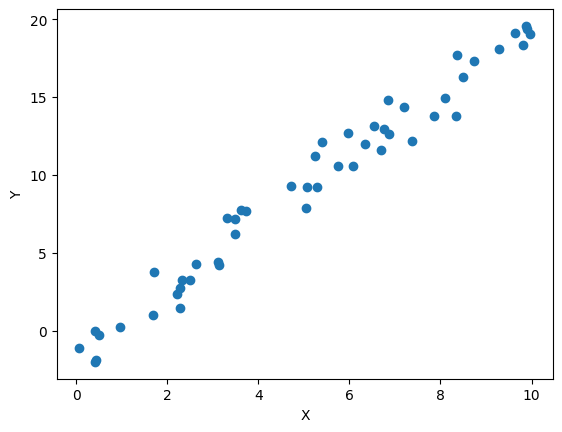

In [25]:
plt.clf()
rng = np.random
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y)
plt.show()


In [26]:
X = x[:, np.newaxis]
X
my_model = MyLinearRegression()
my_model.fit(X, y)
print(f'Score: {my_model.score(X, y)}')
print(f'a = {my_model.a}, b = {my_model.b}')


Score: 0.9714749855186512
a = 2.1095126916745994, b = -1.4848483632587683


In [27]:
model = LinearRegression()
model.fit(X, y)
print(f'Score: {model.score(X, y)}')
print(f'a = {model.coef_[0]}, b = {model.intercept_}')

Score: 0.9714749855186513
a = 2.1095126916746003, b = -1.484848363258772


In [28]:
xx = np.linspace(int(np.min(x)), int(np.max(x)), 10)
yy = my_model.a * xx + my_model.b

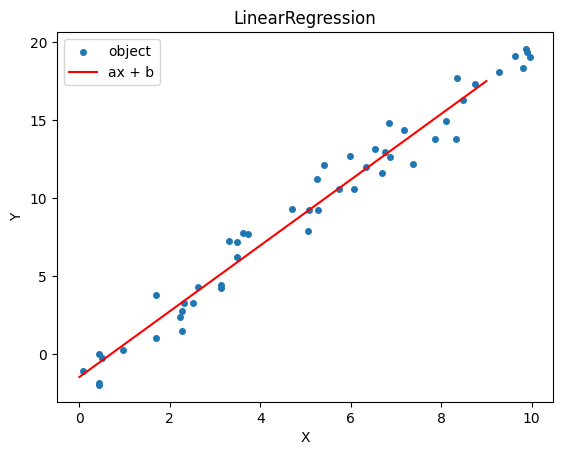

In [29]:
plt.scatter(x, y, s=16)
plt.plot(xx, yy, color='r')
plt.title('LinearRegression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['object', 'ax + b']);

### 3.5 

Score: 0.9907015319025518
a = 1.000656381856304, b = -0.10726546430097272


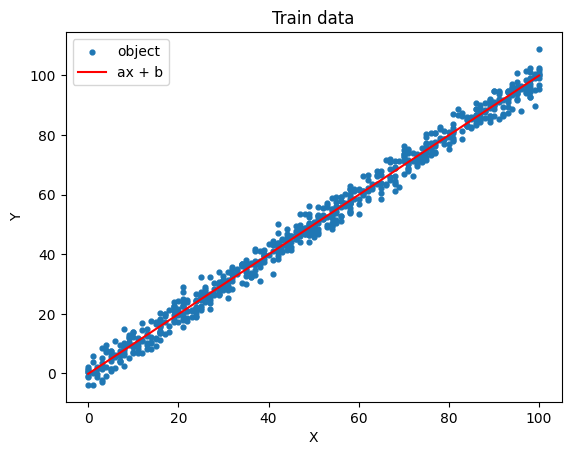

In [30]:

data = []
with open('train.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
data = list(map(lambda el: [float(el[0]), float(el[1])], data[1:]))
data = np.array(data, dtype='float64').T
x, y = data
X = x[:, np.newaxis]

model = LinearRegression()
model.fit(X, y)
print(f'Score: {model.score(X, y)}')
print(f'a = {model.coef_[0]}, b = {model.intercept_}')

xx = np.linspace(np.min(x), np.max(x), 10)
yy = model.coef_[0] * xx + model.intercept_
plt.scatter(x, y, s=12)
plt.title('Train data')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xx, yy, color='r')
plt.legend(['object', 'ax + b']);



    

    

Score: 0.9888014444327563


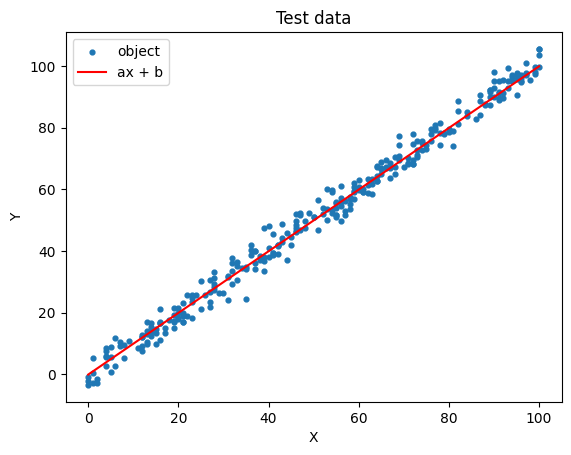

In [31]:
data = []
with open('test.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
data = list(map(lambda el: [float(el[0]), float(el[1])], data[1:]))
data = np.array(data, dtype='float64').T
x, y = data
X = x[:, np.newaxis]
xx = np.linspace(np.min(x), np.max(x), 10)
yy = model.coef_[0] * xx + model.intercept_

print(f'Score: {model.score(X, y)}')

plt.scatter(x, y, s=12)
plt.title('Test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xx, yy, color='r')
plt.legend(['object', 'ax + b']);

